# Logistic Regression
## ME18B114 - Prajwal Sahu

### Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912,
during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding
with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in
the death of 1502 out of 2224 passengers and crew. While there was some element of luck
involved in surviving, it seems some groups of people were more likely to survive than others. In
this challenge, we ask you to build a predictive model that answers the question: “what sorts of
people were more likely to survive?” using passenger data (ie name, age, gender,
socio-economic class, etc).


Two similar datasets include passenger information like name, age, gender, socio-economic
class, etc. One dataset is titled “train.csv” and the other is titled “test.csv”. The train file will
contain the details of a subset of the passengers on board (891 to be exact) and importantly, will
reveal whether they survived or not, also known as the “ground truth”. The test file dataset
contains similar information but does not disclose the “ground truth” for each passenger. It’s
your job to predict these outcomes.

`Survival`- Survival in the crash, 0 = No, 1 = Yes.

`Pclass` - Ticket class of the Passenger, 1 = 1st, 2 = 2nd, 3 = 3rd class.

`Sex` - Male or Female.

`Age` - Age in years.

`Sibsp` - Number of siblings or spouses aboard the Titanic.

`Parch `- Number of parents or children aboard the Titanic.

`Ticket` - Ticket number.

`Fare` - Passenger fare.

`Cabin` - Cabin number.

`Embarked` - Port of Embarkation out of Cherbourg, Queenstown, and Southampton.




## Importing Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
import warnings
warnings.filterwarnings('ignore')


## Importing Data-sets

In [183]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for missing values

<AxesSubplot:>

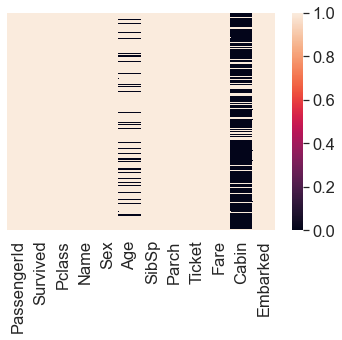

In [187]:
sns.heatmap(train.notnull(),yticklabels=False,cmap ='rocket' )

A lot of cabin data is missing, we can drop it.
The missing data on age can be imputed.

<AxesSubplot:>

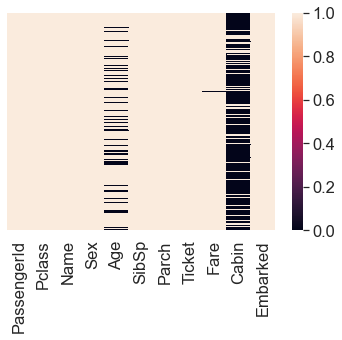

In [188]:

sns.heatmap(test.notnull(),yticklabels=False,cmap ='rocket' )

In [189]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

## Cleaning and Visualizing the numeric variables

### Age


<AxesSubplot:xlabel='Age', ylabel='Count'>

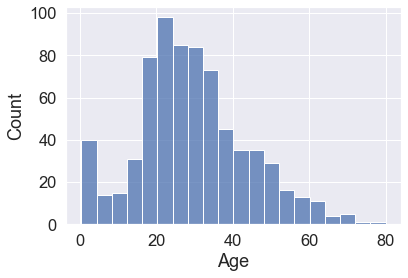

In [190]:
sns.color_palette("flare", as_cmap=True)
sns.histplot(train.Age,palette='flare')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

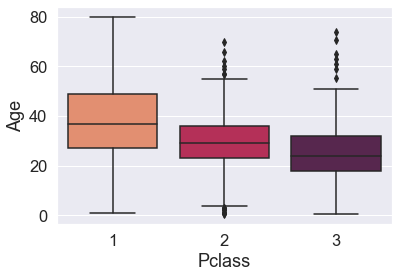

In [191]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='rocket_r')

We see that age depends on the class. Elder people prefer to travel first class.

In [192]:
median_train = train.Age.groupby(train['Pclass']).median()

In [193]:
median_test = test.Age.groupby(test['Pclass']).median()

In [194]:
median_train

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [195]:
median_test

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

#### Imputing Age values class wise

In [196]:
def impute_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age

In [197]:
def impute_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26.5

        else:
            return 24
    else:
        return Age

In [198]:
train['Age'] = train[['Age','Pclass']].apply(impute_train,axis=1)


In [199]:
test['Age'] = test[['Age','Pclass']].apply(impute_test,axis=1)

In [200]:
train['Survived'].groupby(train['Age']).mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

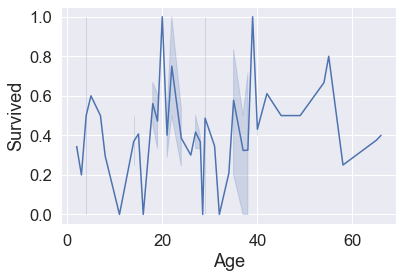

In [201]:
sns.lineplot(x='Age',y=train['Survived'].groupby(train['Age']).mean(),data=train,palette = 'Reds')

### Fare

In [202]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [203]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

Only 1 datapoint of fare is missing

In [204]:
test['Fare']=test.Fare.fillna(test.Fare.median())

In [205]:
train.Fare.mean()

32.2042079685746

In [206]:
median_fare = train['Fare'].groupby(train['Pclass']).mean()
median_fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

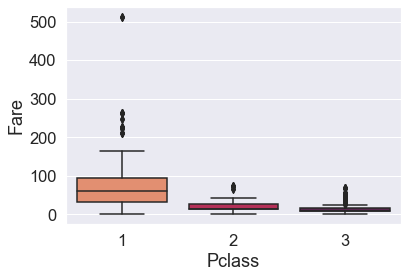

In [207]:
sns.boxplot(x='Pclass',y='Fare',data=train,palette='rocket_r')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

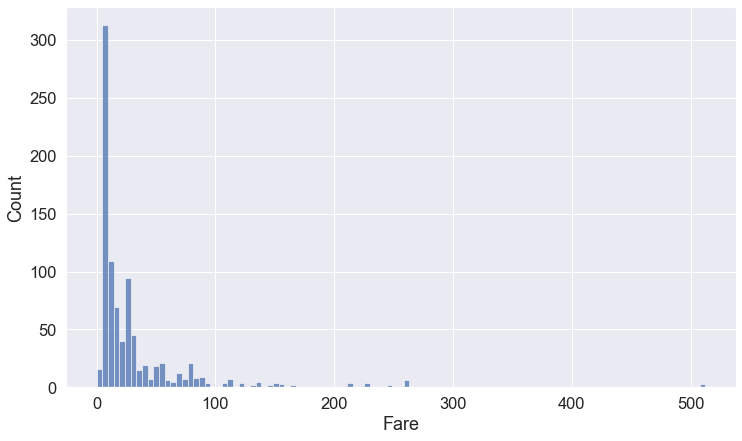

In [208]:
plt.figure(figsize=(12,7))
sns.histplot(train.Fare)

### PClass

<AxesSubplot:xlabel='Survived', ylabel='count'>

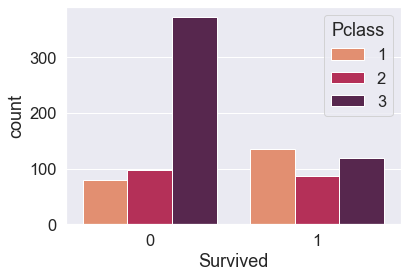

In [209]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rocket_r')

In [210]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

3rd Class have lesser chance of survival comparatively. 



### Travelling alone or with relatives

We will combine Siblings and Parents columns.

In [211]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'Travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'Travelled_alone'] = 'Yes'
    
train['Travelled_alone'].value_counts()

Yes    537
No     354
Name: Travelled_alone, dtype: int64

In [212]:
test['Travelled_alone'].value_counts()

Yes    253
No     165
Name: Travelled_alone, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

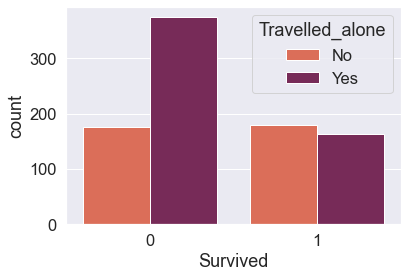

In [213]:
sns.countplot(x='Survived',data=train,hue="Travelled_alone",palette='rocket_r')

In [214]:
train['Survived'].groupby(train['Travelled_alone']).mean()

Travelled_alone
No     0.505650
Yes    0.303538
Name: Survived, dtype: float64

In [215]:
def f(x, term):
    if x == term:
        return 1
    else:
        return 0

In [216]:
train['Travelled_alone'] = train.Travelled_alone.apply(lambda x: f(x, term='Yes'))
test['Travelled_alone'] = test.Travelled_alone.apply(lambda x: f(x, term='Yes'))

## Checking the balance in data

<AxesSubplot:xlabel='Survived', ylabel='count'>

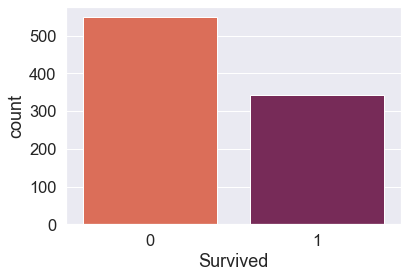

In [217]:
sns.countplot(x='Survived',data=train,palette='rocket_r')

## Feature Engineering for Categorical Variables

### Sex

We check whether survival depends upon gender or not.


<AxesSubplot:xlabel='Survived', ylabel='count'>

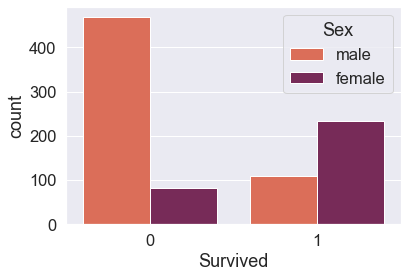

In [218]:
sns.countplot(x='Survived',data=train,hue="Sex",palette='rocket_r')

In [219]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Females had a better chance of survival.



In [220]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [221]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [222]:
def f(x, term):
    if x == term:
        return 1
    else:
        return 0

In [223]:
train['male'] = train.Sex.apply(lambda x: f(x, term='male'))
test['male'] = test.Sex.apply(lambda x: f(x, term='male'))

In [224]:
train['female'] = train.Sex.apply(lambda x: f(x, term='female'))
test['female'] = test.Sex.apply(lambda x: f(x, term='female'))

In [225]:
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

### Embarked

The passengers had 3 embark points, denoted by S, Q and C.

In [226]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [227]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

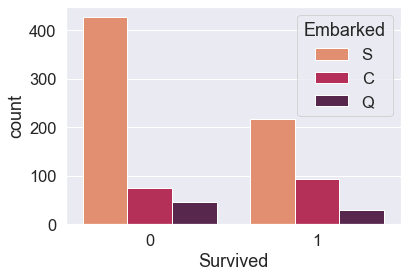

In [228]:
sns.countplot(x='Survived',data=train,hue="Embarked",palette='rocket_r')

There seems to be a clear trend of Southampton passengers having higher chance of survival

In [229]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [230]:
train['EmbarkedS'] = train.Embarked.apply(lambda x: f(x, term='S'))
test['EmbarkedS'] = test.Embarked.apply(lambda x: f(x, term='S'))

In [231]:
train['EmbarkedC'] = train.Embarked.apply(lambda x: f(x, term='C'))
test['EmbarkedC'] = test.Embarked.apply(lambda x: f(x, term='C'))

In [232]:
train['EmbarkedQ'] = train.Embarked.apply(lambda x: f(x, term='Q'))
test['EmbarkedQ'] = test.Embarked.apply(lambda x: f(x, term='Q'))

In [233]:
train.drop(["Embarked"],axis=1, inplace=True)
test.drop(["Embarked"],axis=1, inplace=True)

There is no point in keeping Name and Ticket

In [234]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [235]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,1,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,1,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,1,1,0,1,0,0


In [236]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,3,34.5,0,0,7.8292,0,1,1,0,0,0,1
1,893,3,47.0,1,0,7.0000,1,0,0,1,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,1,0,0,0,1
3,895,3,27.0,0,0,8.6625,0,1,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,2,0,0,1,1,0,0


## Correlation Check

In [237]:
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

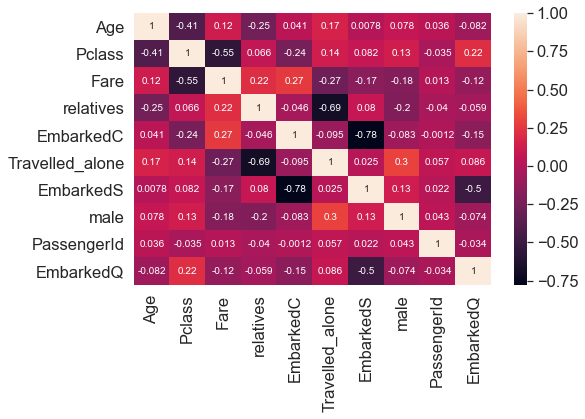

In [238]:
Selected_features = ['Age', 'Pclass', 'Fare', 'relatives', 'EmbarkedC','Travelled_alone',
                     'EmbarkedS', 'male', 'PassengerId','EmbarkedQ']
P = train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(P.corr(), annot=True, cmap="rocket")
plt.show()

No high correlation is witnessed among our variables

## Scaling the Data

Logistic Regression works better on scaled data

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_numerical_features

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [241]:
del train_numerical_features[0:2]
train_numerical_features

['Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [242]:
scaler = StandardScaler()
train = pd.DataFrame(data = train)
train[train_numerical_features] = scaler.fit_transform(train[train_numerical_features])

In [243]:
train

,PassengerId,Survived,Pclass,Age,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,1,0,0.827377,-0.533834,-0.502445,0.059160,-1.231645,0.737695,-0.737695,0.619306,-0.482043,-0.307562
1,2,1,-1.566107,0.674891,0.786845,0.059160,-1.231645,-1.355574,1.355574,-1.614710,2.074505,-0.307562
2,3,1,0.827377,-0.231653,-0.488854,-0.560975,0.811922,-1.355574,1.355574,0.619306,-0.482043,-0.307562
3,4,1,-1.566107,0.448255,0.420730,0.059160,-1.231645,-1.355574,1.355574,0.619306,-0.482043,-0.307562
4,5,0,0.827377,0.448255,-0.486337,-0.560975,0.811922,0.737695,-0.737695,0.619306,-0.482043,-0.307562
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.369365,-0.156107,-0.386671,-0.560975,0.811922,0.737695,-0.737695,0.619306,-0.482043,-0.307562
887,888,1,-1.566107,-0.760469,-0.044381,-0.560975,0.811922,-1.355574,1.355574,0.619306,-0.482043,-0.307562
888,889,0,0.827377,-0.382743,-0.176263,1.299429,-1.231645,-1.355574,1.355574,0.619306,-0.482043,-0.307562
889,890,1,-1.566107,-0.231653,-0.044381,-0.560975,0.811922,0.737695,-0.737695,-1.614710,2.074505,-0.307562


In [244]:
test_numerical_features = list(test.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId',
 'Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [245]:
del test_numerical_features[0:1]
test_numerical_features

['Pclass',
 'Age',
 'Fare',
 'relatives',
 'Travelled_alone',
 'male',
 'female',
 'EmbarkedS',
 'EmbarkedC',
 'EmbarkedQ']

In [246]:
test = pd.DataFrame(data = test)
test[test_numerical_features] = scaler.fit_transform(test[test_numerical_features])

In [247]:
test

,PassengerId,Pclass,Age,Fare,relatives,Travelled_alone,male,female,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,0.873482,0.393048,-0.497413,-0.553443,0.807573,0.755929,-0.755929,-1.350676,-0.568142,2.843757
1,893,0.873482,1.356309,-0.512278,0.105643,-1.238278,-1.322876,1.322876,0.740370,-0.568142,-0.351647
2,894,-0.315819,2.512223,-0.464100,-0.553443,0.807573,0.755929,-0.755929,-1.350676,-0.568142,2.843757
3,895,0.873482,-0.184909,-0.482475,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
4,896,0.873482,-0.570214,-0.417492,0.764728,-1.238278,-1.322876,1.322876,0.740370,-0.568142,-0.351647
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,-0.416092,-0.493455,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
414,1306,-1.505120,0.739822,1.314435,-0.553443,0.807573,-1.322876,1.322876,-1.350676,1.760125,-0.351647
415,1307,0.873482,0.701291,-0.507796,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647
416,1308,0.873482,-0.416092,-0.493455,-0.553443,0.807573,0.755929,-0.755929,0.740370,-0.568142,-0.351647


## Model

### Train Test Split

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId','Survived'],axis=1), 
                                                    train['Survived'], test_size=0.2, 
                                                    random_state=45)

### Training

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
logmodel= LogisticRegression()

In [252]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [253]:
logmodel.score(X_train,y_train)

0.7963483146067416

In [254]:
coeff_df = pd.DataFrame(logmodel.coef_.flatten(),X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pclass,-0.896801
Age,-0.555191
Fare,0.177938
relatives,-0.625110
Travelled_alone,-0.276369
male,-0.622823
female,0.622823
EmbarkedS,-0.244168
EmbarkedC,-0.192774
EmbarkedQ,0.010602


### Predictions and Metrics

In [255]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [256]:
pred_test = logmodel.predict(X_test)
pred_train = logmodel.predict(X_train)

### Training error

In [257]:
cm = confusion_matrix(y_train, pred_train)
cm

array([[374,  58],
       [ 87, 193]], dtype=int64)

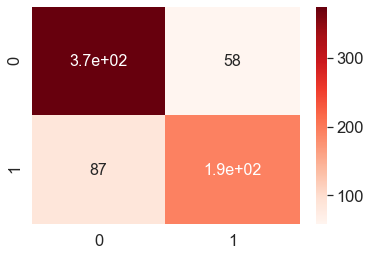

In [258]:
df_cm = pd.DataFrame(cm)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [259]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       432
           1       0.77      0.69      0.73       280

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.80      0.79       712



### Testing set

In [260]:
cm_test = confusion_matrix(y_test, pred_test)
cm_test

array([[103,  14],
       [ 14,  48]], dtype=int64)

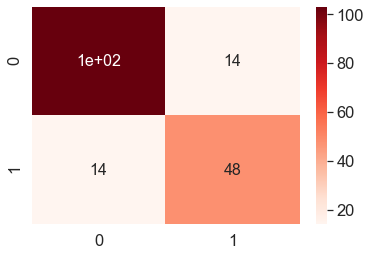

In [261]:
df_cm = pd.DataFrame(cm_test)

sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="Reds") # font size

plt.show()

In [262]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [266]:
pred = logmodel.predict(test.drop(['PassengerId'],axis=1))

In [267]:
predicted_data=pd.DataFrame(pred,columns=['Survival'])

In [268]:
me18b114_prajwal = pd.concat([test,predicted_data],axis=1)

In [271]:
me18b114_prajwal.to_csv('me18b114_assign2_test_predictions.csv')